In [227]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
zip_path = '/content/drive/MyDrive/Dataset/ALZHEIMER MRI.zip'

In [230]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/alzheimer_dataset')  # Folder to extract to

In [231]:
train_path = "/content/alzheimer_dataset/train"

In [232]:
x, y = [], []

for i in os.listdir(train_path):
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        image_path = os.path.join(folder_path, j)
        array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        array_resize = cv2.resize(array, (100, 100))
        array_reshape = array_resize.reshape(100, 100, 1)
        array_norm = array_reshape / 255.0
        x.append(array_norm)
        y.append(i)

#Convert to numpy arrays
x = np.array(x)
y = np.array(y)

print("X shape:", x.shape)
print("Y shape:", y.shape)


X shape: (10240, 100, 100, 1)
Y shape: (10240,)


In [233]:
y

array(['Mild Impairment', 'Mild Impairment', 'Mild Impairment', ...,
       'No Impairment', 'No Impairment', 'No Impairment'], dtype='<U20')

In [234]:
le=LabelEncoder()

In [235]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 2, 2, 2])

In [236]:
y.shape

(10240,)

In [237]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [238]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

8192 8192
2048 2048


In [239]:
ytest

array([1, 0, 2, ..., 2, 2, 1])

In [240]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(4, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [241]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,028 (16.61 MB)

 Trainable params: 4,353,028 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [242]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [243]:
history = model.fit(xtrain,ytrain,batch_size=32,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4002 - loss: 1.3101 - val_accuracy: 0.7891 - val_loss: 0.4881
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8078 - loss: 0.4404 - val_accuracy: 0.8413 - val_loss: 0.3662
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8579 - loss: 0.3284 - val_accuracy: 0.8638 - val_loss: 0.3124
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9109 - loss: 0.2316 - val_accuracy: 0.8887 - val_loss: 0.2698
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9258 - loss: 0.1946 - val_accuracy: 0.9150 - val_loss: 0.2229
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9489 - loss: 0.1316 - val_accuracy: 0.9409 - val_loss: 0.1443
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9756 - loss: 0.0741 - val_accuracy: 0.9458 - val_loss: 0.1572
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9785 - loss: 0.0644 - val_accu

In [244]:
test_path = "/content/alzheimer_dataset/test/No Impairment/1 (35).jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']
print(f"Prediction:{l[a]}")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
Prediction:No impairment


In [245]:
test_path = "/content/alzheimer_dataset/test/Mild Impairment/6 (28).jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']
print(f"Prediction:{l[a]}")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction:Mild impairment


In [246]:
test_path = "/content/alzheimer_dataset/test/Very Mild Impairment/2 (54).jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']
print(f"Prediction:{l[a]}")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction:Very mild impairment


In [247]:
test_path = "/content/alzheimer_dataset/test/Moderate Impairment/19.jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']
print(f"Prediction:{l[a]}")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction:Moderate impairment


In [248]:
print(model.input_shape)

(None, 100, 100, 1)


In [249]:
#Evaluate model on test set
test_loss, test_acc = model.evaluate(xtest, ytest)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9728 - loss: 0.0763
Test Accuracy: 0.97216796875
Test Loss: 0.0789308249950409


In [250]:
#Predictions on test set
y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = ytest

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


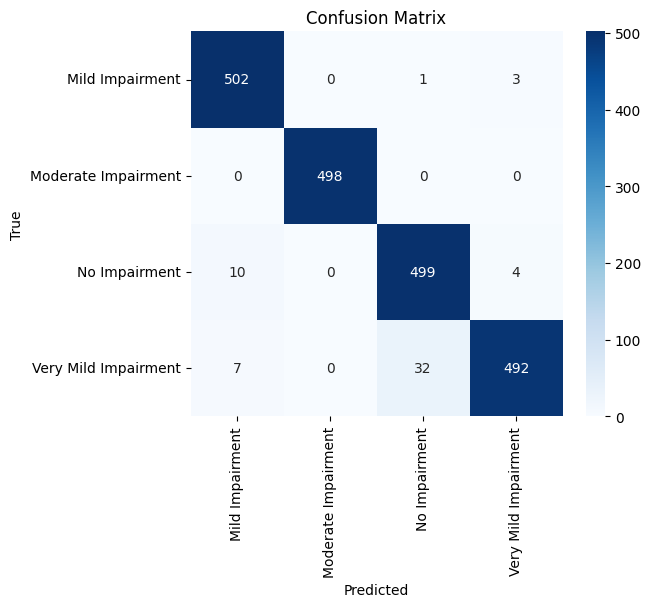

In [251]:
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [252]:
#Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Classification Report:

                      precision    recall  f1-score   support

     Mild Impairment       0.97      0.99      0.98       506
 Moderate Impairment       1.00      1.00      1.00       498
       No Impairment       0.94      0.97      0.96       513
Very Mild Impairment       0.99      0.93      0.96       531

            accuracy                           0.97      2048
           macro avg       0.97      0.97      0.97      2048
        weighted avg       0.97      0.97      0.97      2048



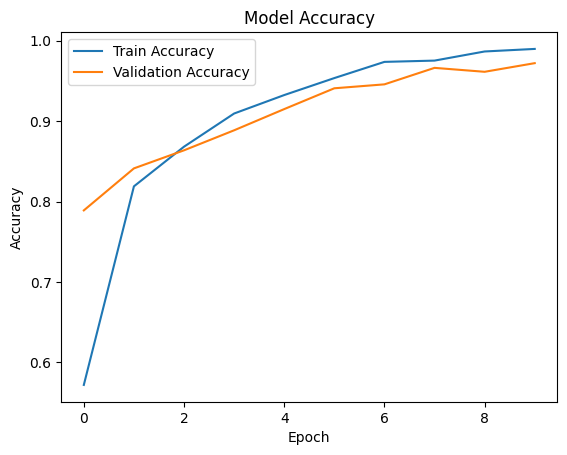

In [253]:
#Accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

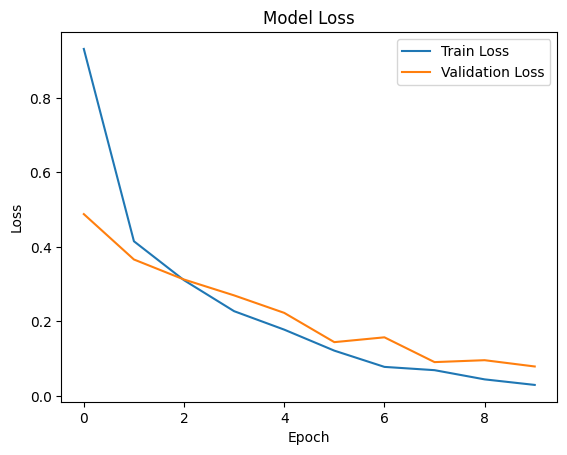

In [254]:
#Loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
